In [ ]:
# Debe Crear un Computer Vision Resource en Azure.
# Aqui es donde obtiene el API Key.

<img src="img/azure1.PNG" />

In [ ]:
#!pip install --upgrade azure-cognitiveservices-vision-computervision

In [3]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time
from skimage import io

In [4]:
subscription_key = "fbe1d5efa54f4665b81095d3f1a2f56f"
endpoint = "https://visionjuanzamoraresource.cognitiveservices.azure.com/"

In [5]:
# autenticacion del cliente de azure.
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

## Cargar Imagen Remota

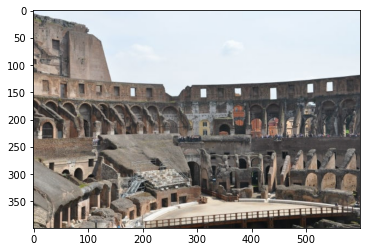

In [7]:
import matplotlib.pyplot as plt
remote_image_url = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/landmark.jpg"

image = io.imread(remote_image_url)
plt.imshow(image)
plt.show()

## Obtener Descripcion de la Imagen

In [8]:
'''
Describe an Image - remote
This example describes the contents of an image with the confidence score.
'''
print("===== Describe an image - remote =====")
# Call API
description_results = computervision_client.describe_image(remote_image_url )

# Get the captions (descriptions) from the response, with confidence level
print("Description of remote image: ")
if (len(description_results.captions) == 0):
    print("No description detected.")
else:
    for caption in description_results.captions:
        print("'{}' with confidence {:.2f}%".format(caption.text, caption.confidence * 100))

===== Describe an image - remote =====
Description of remote image: 
'a large stone structure with many arches with Colosseum in the background' with confidence 26.39%


## Categoria de la Imagen

In [9]:
'''
Categorize an Image - remote
This example extracts (general) categories from a remote image with a confidence score.
'''
print("===== Categorize an image - remote =====")
# Select the visual feature(s) you want.
remote_image_features = ["categories"]
# Call API with URL and features
categorize_results_remote = computervision_client.analyze_image(remote_image_url , remote_image_features)

# Print results with confidence score
print("Categories from remote image: ")
if (len(categorize_results_remote.categories) == 0):
    print("No categories detected.")
else:
    for category in categorize_results_remote.categories:
        print("'{}' with confidence {:.2f}%".format(category.name, category.score * 100))

===== Categorize an image - remote =====
Categories from remote image: 
'building_' with confidence 31.64%
'others_' with confidence 0.39%
'outdoor_' with confidence 3.91%


## Tags (etiquetas)

In [10]:
'''
Tag an Image - remote
This example returns a tag (key word) for each thing in the image.
'''
print("===== Tag an image - remote =====")
# Call API with remote image
tags_result_remote = computervision_client.tag_image(remote_image_url )

# Print results with confidence score
print("Tags in the remote image: ")
if (len(tags_result_remote.tags) == 0):
    print("No tags detected.")
else:
    for tag in tags_result_remote.tags:
        print("'{}' with confidence {:.2f}%".format(tag.name, tag.confidence * 100))

===== Tag an image - remote =====
Tags in the remote image: 
'building' with confidence 99.92%
'outdoor' with confidence 97.66%
'sky' with confidence 93.79%
'ruins' with confidence 76.13%
'amphitheatre' with confidence 56.34%


## Deteccion de Objetos

In [11]:
'''
Detect Objects - remote
This example detects different kinds of objects with bounding boxes in a remote image.
'''
print("===== Detect Objects - remote =====")
# Get URL image with different objects
remote_image_url_objects = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/objects.jpg"
# Call API with URL
detect_objects_results_remote = computervision_client.detect_objects(remote_image_url_objects)

# Print detected objects results with bounding boxes
print("Detecting objects in remote image:")
if len(detect_objects_results_remote.objects) == 0:
    print("No objects detected.")
else:
    for object in detect_objects_results_remote.objects:
        print("object at location {}, {}, {}, {}".format( \
        object.rectangle.x, object.rectangle.x + object.rectangle.w, \
        object.rectangle.y, object.rectangle.y + object.rectangle.h))

===== Detect Objects - remote =====
Detecting objects in remote image:
object at location 213, 365, 85, 208
object at location 218, 402, 179, 384
object at location 238, 417, 298, 416
object at location 116, 419, 60, 386


In [ ]:
print(detect_objects_results_remote.objects)

## Detectar Marcas

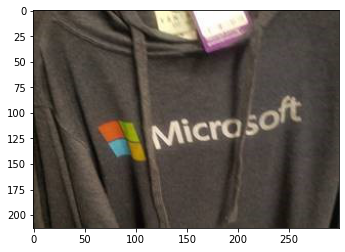

In [12]:
remote_image_url = "https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/gray-shirt-logo.jpg"

image = io.imread(remote_image_url)
plt.imshow(image)
plt.show()

In [13]:
'''
Detect Brands - remote
This example detects common brands like logos and puts a bounding box around them.
'''
print("===== Detect Brands - remote =====")
# Get a URL with a brand logo
remote_image_url = "https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/gray-shirt-logo.jpg"
# Select the visual feature(s) you want
remote_image_features = ["brands"]
# Call API with URL and features
detect_brands_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

print("Detecting brands in remote image: ")
if len(detect_brands_results_remote.brands) == 0:
    print("No brands detected.")
else:
    for brand in detect_brands_results_remote.brands:
        print("'{}' brand detected with confidence {:.1f}% at location {}, {}, {}, {}".format( \
        brand.name, brand.confidence * 100, brand.rectangle.x, brand.rectangle.x + brand.rectangle.w, \
        brand.rectangle.y, brand.rectangle.y + brand.rectangle.h))

===== Detect Brands - remote =====
Detecting brands in remote image: 
'Microsoft' brand detected with confidence 62.5% at location 58, 113, 106, 152
'Microsoft' brand detected with confidence 69.8% at location 58, 260, 86, 149


## Deteccion Facial

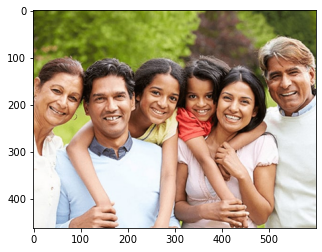

In [14]:
remote_image_url_faces = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/faces.jpg"
image = io.imread(remote_image_url_faces)
plt.imshow(image)
plt.show()

In [15]:
'''
Detect Faces - remote
This example detects faces in a remote image, gets their gender and age, 
and marks them with a bounding box.
'''
print("===== Detect Faces - remote =====")
# Get an image with faces
remote_image_url_faces = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/faces.jpg"
# Select the visual feature(s) you want.
remote_image_features = ["faces"]
# Call the API with remote URL and features
detect_faces_results_remote = computervision_client.analyze_image(remote_image_url_faces, remote_image_features)

# Print the results with gender, age, and bounding box
print("Faces in the remote image: ")
if (len(detect_faces_results_remote.faces) == 0):
    print("No faces detected.")
else:
    for face in detect_faces_results_remote.faces:
        print("'{}' of age {} at location {}, {}, {}, {}".format(face.gender, face.age, \
        face.face_rectangle.left, face.face_rectangle.top, \
        face.face_rectangle.left + face.face_rectangle.width, \
        face.face_rectangle.top + face.face_rectangle.height))

===== Detect Faces - remote =====
Faces in the remote image: 
'Male' of age 39 at location 118, 159, 212, 253
'Male' of age 54 at location 492, 111, 582, 201
'Female' of age 55 at location 18, 153, 102, 237
'Female' of age 33 at location 386, 166, 467, 247
'Female' of age 18 at location 235, 158, 311, 234
'Female' of age 8 at location 323, 163, 391, 231


## Contenido Sensible

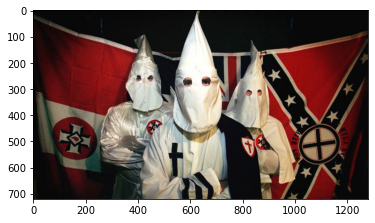

In [16]:
remote_image_url = "https://www.splcenter.org/sites/default/files/group_images/SPLC-Intelligence-Files-Groups-Brotherhood-of-Klans-1280x720_0.jpg"
image = io.imread(remote_image_url)
plt.imshow(image)
plt.show()

In [17]:
'''
Detect Adult or Racy Content - remote
This example detects adult or racy content in a remote image, then prints the adult/racy score.
The score is ranged 0.0 - 1.0 with smaller numbers indicating negative results.
'''
print("===== Detect Adult or Racy Content - remote =====")
# Select the visual feature(s) you want
remote_image_features = ["adult"]
# Call API with URL and features
detect_adult_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

# Print results with adult/racy score
print("Analyzing remote image for adult or racy content ... ")
print("Is adult content: {} with confidence {:.2f}".format(detect_adult_results_remote.adult.is_adult_content, detect_adult_results_remote.adult.adult_score))
print("Has racy content: {} with confidence {:.2f}".format(detect_adult_results_remote.adult.is_racy_content, detect_adult_results_remote.adult.racy_score))

===== Detect Adult or Racy Content - remote =====
Analyzing remote image for adult or racy content ... 
Is adult content: False with confidence 0.01
Has racy content: False with confidence 0.01


In [18]:
## Color Schema
'''
Detect Color - remote
This example detects the different aspects of its color scheme in a remote image.
'''
print("===== Detect Color - remote =====")
# Select the feature(s) you want
remote_image_features = ["color"]
# Call API with URL and features
detect_color_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

# Print results of color scheme
print("Getting color scheme of the remote image: ")
print("Is black and white: {}".format(detect_color_results_remote.color.is_bw_img))
print("Accent color: {}".format(detect_color_results_remote.color.accent_color))
print("Dominant background color: {}".format(detect_color_results_remote.color.dominant_color_background))
print("Dominant foreground color: {}".format(detect_color_results_remote.color.dominant_color_foreground))
print("Dominant colors: {}".format(detect_color_results_remote.color.dominant_colors))

===== Detect Color - remote =====
Getting color scheme of the remote image: 
Is black and white: False
Accent color: 7B1414
Dominant background color: Black
Dominant foreground color: Black
Dominant colors: ['Black', 'Red']


## Contenido Especifico sobre un Contexto

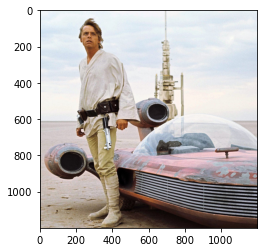

In [19]:
remote_image_url_celebs = "https://i.guim.co.uk/img/media/a23aeb1f7ff20bb80f68852da17743b0e557f8ed/0_224_3504_2102/master/3504.jpg?width=1200&height=1200&quality=85&auto=format&fit=crop&s=9e9a99e479ee60270b69ede4d869b20f"
image = io.imread(remote_image_url_celebs)
plt.imshow(image)
plt.show()

In [20]:
'''
Detect Domain-specific Content - remote
This example detects celebrites and landmarks in remote images.
'''
print("===== Detect Domain-specific Content - remote =====")
# Call API with content type (celebrities) and URL
detect_domain_results_celebs_remote = computervision_client.analyze_image_by_domain("celebrities", remote_image_url_celebs)

# Print detection results with name
print("Celebrities in the remote image:")
if len(detect_domain_results_celebs_remote.result["celebrities"]) == 0:
    print("No celebrities detected.")
else:
    for celeb in detect_domain_results_celebs_remote.result["celebrities"]:
        print(celeb["name"])

===== Detect Domain-specific Content - remote =====
Celebrities in the remote image:
Mark Hamill


## Info sobre la imagen

In [21]:
'''
Detect Image Types - remote
This example detects an image's type (clip art/line drawing).
'''
print("===== Detect Image Types - remote =====")
# Get URL of an image with a type
remote_image_url_type = remote_image_url_celebs
# Select visual feature(s) you want
remote_image_features = [VisualFeatureTypes.image_type]
# Call API with URL and features
detect_type_results_remote = computervision_client.analyze_image(remote_image_url_type, remote_image_features)

# Prints type results with degree of accuracy
print("Type of remote image:")
if detect_type_results_remote.image_type.clip_art_type == 0:
    print("Image is not clip art.")
elif detect_type_results_remote.image_type.line_drawing_type == 1:
    print("Image is ambiguously clip art.")
elif detect_type_results_remote.image_type.line_drawing_type == 2:
    print("Image is normal clip art.")
else:
    print("Image is good clip art.")

if detect_type_results_remote.image_type.line_drawing_type == 0:
    print("Image is not a line drawing.")
else:
    print("Image is a line drawing")

===== Detect Image Types - remote =====
Type of remote image:
Image is not clip art.
Image is not a line drawing.


## Lectura texto

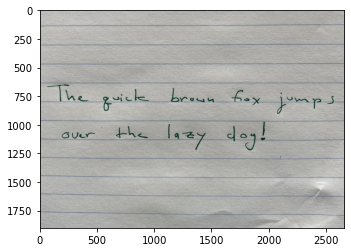

In [22]:
remote_image_handw_text_url = "https://raw.githubusercontent.com/MicrosoftDocs/azure-docs/master/articles/cognitive-services/Computer-vision/Images/readsample.jpg"
image = io.imread(remote_image_handw_text_url)
plt.imshow(image)
plt.show()

In [23]:
# Call API with URL and raw response (allows you to get the operation location)
recognize_handw_results = computervision_client.read(remote_image_handw_text_url,  raw=True)

# Get the operation location (URL with an ID at the end) from the response
operation_location_remote = recognize_handw_results.headers["Operation-Location"]
# Grab the ID from the URL
operation_id = operation_location_remote.split("/")[-1]

# Call the "GET" API and wait for it to retrieve the results 
while True:
    get_handw_text_results = computervision_client.get_read_result(operation_id)
    if get_handw_text_results.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

# Print the detected text, line by line
if get_handw_text_results.status == OperationStatusCodes.succeeded:
    for text_result in get_handw_text_results.analyze_result.read_results:
        for line in text_result.lines:
            print(line.text)
            print(line.bounding_box)
print()

The quick brown fox jumps
[38.0, 650.0, 2572.0, 699.0, 2570.0, 854.0, 37.0, 815.0]
over
[184.0, 1053.0, 508.0, 1044.0, 510.0, 1123.0, 184.0, 1128.0]
the lazy dog!
[639.0, 1011.0, 1976.0, 1026.0, 1974.0, 1158.0, 637.0, 1141.0]

